In [1]:
# Import pandas
import pandas as pd
import numpy as np

file=pd.read_csv("d2.csv")
x=file.iloc[:,:-1]
year=file['year']
y=file['USD Exchange Rate']
y=pd.DataFrame(y)
nontouch=x.copy()
x.head(5)

,year,"Current account balance (BoP, current US$)",Current External debt US $,GDP in USD,Inflation Rate,Trade (% of GDP),"Total reserves (includes gold, current US$)"
0,1976,-7.499965e+08,6.802352e+09,1.316808e+10,7.158324,28.945875,6.841404e+08
1,1977,-7.305108e+08,7.564124e+09,1.512606e+10,10.132968,27.200363,7.157019e+08
2,1978,-7.148817e+08,8.329289e+09,1.781152e+10,6.138693,27.918042,7.959416e+08
3,1979,-1.111091e+09,8.918891e+09,1.968838e+10,8.267047,32.864582,1.144047e+09
4,1980,-8.660988e+08,9.931199e+09,2.365444e+10,11.938231,35.896899,1.567771e+09


In [2]:
x.describe()

,year,"Current account balance (BoP, current US$)",Current External debt US $,GDP in USD,Inflation Rate,Trade (% of GDP),"Total reserves (includes gold, current US$)"
count,45.000000,4.500000e+01,4.500000e+01,4.500000e+01,45.000000,45.000000,4.500000e+01
mean,1998.000000,-2.920951e+09,3.746341e+10,1.094112e+11,8.141922,32.175594,7.028446e+09
std,13.133926,4.530535e+09,2.687753e+10,9.381562e+10,3.616280,3.554147,6.832983e+09
min,1976.000000,-1.885899e+10,6.802352e+09,1.316808e+10,2.529328,25.306232,6.841404e+08
25%,1987.000000,-3.606200e+09,1.679767e+10,3.335153e+10,5.614839,29.043322,1.455323e+09
50%,1998.000000,-1.422306e+09,3.202874e+10,6.297386e+10,7.844265,32.868927,2.527544e+09
75%,2009.000000,-7.946738e+08,5.663441e+10,1.700000e+11,10.373809,35.034576,1.287802e+10
max,2020.000000,3.854000e+09,1.157000e+11,3.150000e+11,20.286121,38.499317,2.202761e+10


In [3]:
y=pd.DataFrame(y)
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()
X_train_minmax = mm_scaler.fit_transform(x)
X=mm_scaler.transform(x)
# x = pd.DataFrame(X ,columns = ['Current account balance (BoP, current US$)','Current External debt US $	','GDP in USD	','Inflation Rate','Trade (% of GDP)','debit interest rate', 'lending interest rate','Total reserves (includes gold, current US$)'])
x = pd.DataFrame(X ,columns = ['year','Current account balance (BoP, current US$)','Current External debt US $','GDP in USD','Inflation Rate','Trade (% of GDP)','Total reserves (includes gold, current US$)'])
# 
#GDP
# x = pd.DataFrame(X ,columns = ['Current account balance (BoP, current US$)','Current External debt US $','Inflation Rate','Trade (% of GDP)','Total reserves (includes gold, current US$)'])

# X_train_minmax = mm_scaler.fit_transform(y)
# y=mm_scaler.transform(y)
x.describe()

,year,"Current account balance (BoP, current US$)",Current External debt US $,GDP in USD,Inflation Rate,Trade (% of GDP),"Total reserves (includes gold, current US$)"
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,0.500000,0.701715,0.281559,0.318863,0.316082,0.520679,0.297248
std,0.298498,0.199469,0.246815,0.310821,0.203656,0.269395,0.320144
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.671545,0.091786,0.066870,0.173765,0.283261,0.036132
50%,0.500000,0.767697,0.231652,0.165012,0.299318,0.573232,0.086369
75%,0.750000,0.795330,0.457605,0.519600,0.441773,0.737382,0.571317
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
# introducing higher degrees
from sklearn.preprocessing import PolynomialFeatures
# by default, the degree is 2
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(x)
X=pd.DataFrame(X_poly)

X.head(5)

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,1.0,0.000000,0.797297,0.000000,0.000000,0.260689,0.275875,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.067959,0.071918,0.000000,0.076107,0.000000,0.000000
1,1.0,0.022727,0.798155,0.006995,0.006487,0.428210,0.143570,0.001479,0.000517,0.018140,...,0.000042,0.002778,0.000931,0.000010,0.183364,0.061478,0.000633,0.020612,0.000212,0.000002
2,1.0,0.045455,0.798843,0.014022,0.015384,0.203267,0.197968,0.005238,0.002066,0.036311,...,0.000237,0.003127,0.003046,0.000081,0.041317,0.040240,0.001065,0.039191,0.001037,0.000027
3,1.0,0.068182,0.781399,0.019436,0.021602,0.323128,0.572902,0.021548,0.004649,0.053277,...,0.000467,0.006980,0.012376,0.000465,0.104412,0.185121,0.006963,0.328217,0.012345,0.000464
4,1.0,0.090909,0.792185,0.028732,0.034742,0.529876,0.802744,0.041401,0.008264,0.072017,...,0.001207,0.018409,0.027889,0.001438,0.280769,0.425355,0.021937,0.644398,0.033234,0.001714


In [5]:
from sklearn.model_selection import train_test_split
## dependent & independent variables
# X = df[['YearsExperience']].values
# Y = df[['Salary']].values
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [6]:
Y_test.head()

,USD Exchange Rate
42,121.824069
39,102.769272
25,61.927162
3,9.900000
22,45.046667


In [7]:
theta=np.zeros((X_train.shape[1],1))
theta.shape

(36, 1)

In [8]:
# theta=theta.dropna

# theta=theta.to_numpy(theta)
# X_ready= X_ready.to_numpy(X_ready)

# print(y.shape)

def costfunction(X,Y,theta1):
  J=0
#   grad=np.zeros((theta1.shape))
  h=np.dot(X,theta1)
  m=len(Y)
  J= np.sqrt(1/(m) * (np.sum((np.square(h-Y)))))
#   grad=(1/m) *(np.dot(X.T,(h-Y)))
  return J


# print(costfunction(X_ready,y,theta))

def gredient(X,Y,theta2,alpha,itera):
  theta2=np.zeros((X.shape[1],1))
 
  for i in range(0,itera):

    # h=np.dot(X,theta2)
    m=len(Y)
    # print("h value",h.shape)
    # print("theta value",theta2.shape)
    # print("Y shape",Y.shape)
    # print("h-y",(h - Y).shape)
    # theta2[0:1]=theta2[0:1]-((1/m)* alpha) * (np.sum(h - Y))
    # theta2[1:]=theta2[1:]-((1/m)* alpha )* np.sum((X[:,1:].T.dot((h - Y))))
    theta2 = theta2 - (alpha/m)*(np.dot(X.T, np.dot(X, theta2) - Y))

    # print(costfunction(X,Y,theta2))
    # print("after theta value",theta2.shape)

    # print(theta2)
  print(costfunction(X,Y,theta2))
  # print(X)
  return theta2

theta_ready=gredient(X_train,Y_train,theta,0.16,80010)
# theta_ready=gredient(X_train,Y_train,theta,0,1)



USD Exchange Rate    0.632138
dtype: float64


In [9]:
test=np.zeros((Y_test.shape))
test=np.dot(X_test,theta_ready)
test

array([[120.02133941],
       [ 99.87378001],
       [ 56.00379936],
       [  9.36776394],
       [ 43.94175434],
       [ 57.04841491],
       [ 11.29355238],
       [  9.29024666],
       [ 60.92961671]])

In [10]:
Y_test

,USD Exchange Rate
42,121.824069
39,102.769272
25,61.927162
3,9.900000
22,45.046667
26,59.723782
6,11.847467
4,9.900000
28,58.257863


In [11]:
train=np.zeros((Y_train.shape))
train=np.dot(X_train,theta_ready)
train=train[train,Y_train]

IndexError: arrays used as indices must be of integer (or boolean) type

In [12]:
Y_test=Y_test.values
Y_train=Y_train.values

In [13]:
SSR=sum(np.square(Y_test - np.dot(X_test,theta_ready)))
SST=sum(np.square(Y_test - Y_test.mean()))
R2=1-SSR/SST
R2

array([0.99507659])

In [14]:
SSR=sum(np.square(Y_train -np.dot(X_train, theta_ready)))
SST=sum(np.square(Y_train - Y_train.mean()))
R2=1-SSR/SST
R2

array([0.99975129])

In [15]:
cost=costfunction(X_test,Y_test,theta_ready)
print(cost)

2.6499162728468115


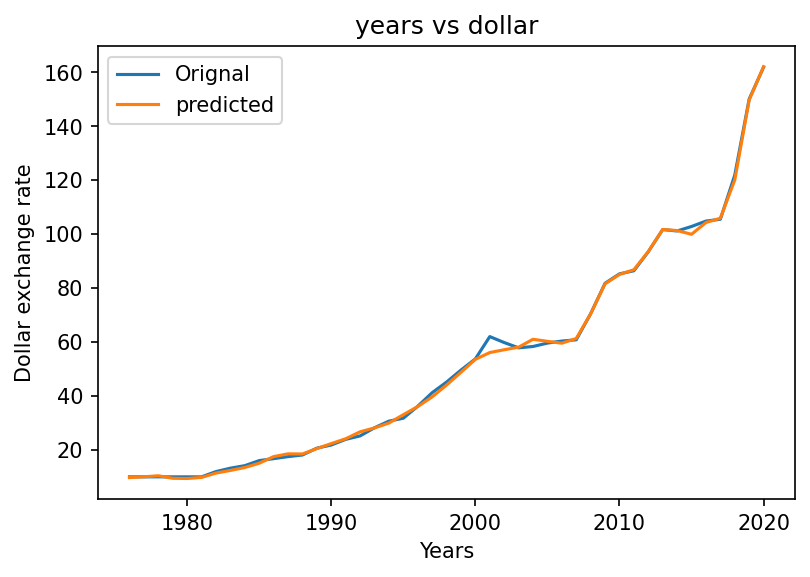

In [16]:
import matplotlib.pyplot as plt


plt.figure(dpi=150)
plt.title("years vs dollar")
plt.xlabel('Years')
plt.ylabel('Dollar exchange rate')
# plt.grid(color='black')
plt.plot(year,np.array(y), label='Orignal')
plt.plot(np.array(year),np.array(np.dot(X, theta_ready)), label='predicted')
plt.legend()
 

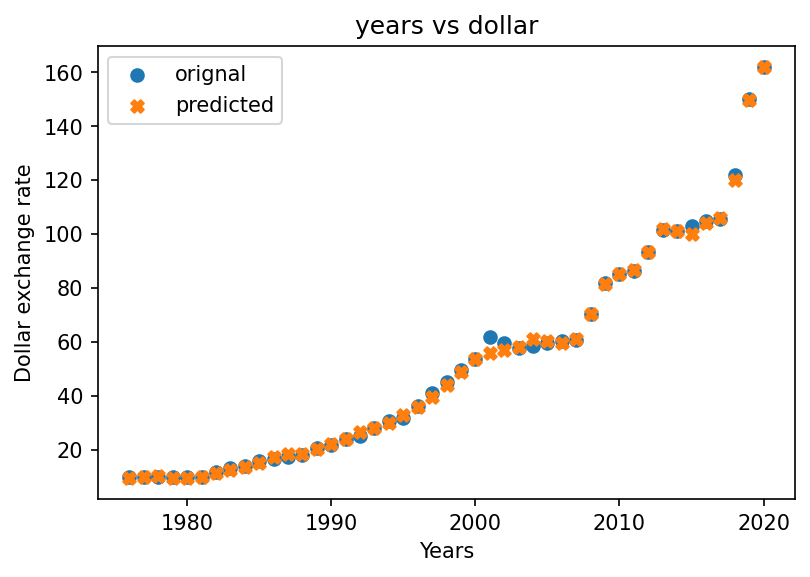

In [19]:
import matplotlib.pyplot as plt
h=np.dot(X,theta_ready)

plt.figure(dpi=150)
plt.title("years vs dollar")
plt.xlabel('Years')
plt.ylabel('Dollar exchange rate')
# plt.grid(color='black')
# plt.plot(year,y, label='Orignal')
# plt.plot(year,np.dot(x, theta_ready), label='predicted')
plt.scatter(year,y, label='orignal')
plt.scatter(year,h, label='predicted', marker='X')
plt.legend()
 

In [20]:
y=pd.DataFrame(y)
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()
X_train_minmax = mm_scaler.fit_transform(y)
Y=mm_scaler.transform(y)
# x = pd.DataFrame(X ,columns = ['Current account balance (BoP, current US$)','Current External debt US $	','GDP in USD	','Inflation Rate','Trade (% of GDP)','debit interest rate', 'lending interest rate','Total reserves (includes gold, current US$)'])
# Y = pd.DataFrame(X ,columns = ['year','Current account balance (BoP, current US$)','Current External debt US $','GDP in USD','Inflation Rate','Trade (% of GDP)','Total reserves (includes gold, current US$)'])
# 
#GDP
# x = pd.DataFrame(X ,columns = ['Current account balance (BoP, current US$)','Current External debt US $','Inflation Rate','Trade (% of GDP)','Total reserves (includes gold, current US$)'])

# X_train_minmax = mm_scaler.fit_transform(y)
# y=mm_scaler.transform(y)
# x.describe()
Y.shape

(45, 1)

In [21]:
y=pd.DataFrame(y)
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()
X_train_minmax = mm_scaler.fit_transform(h)
h=mm_scaler.transform(h)
# x = pd.DataFrame(X ,columns = ['Current account balance (BoP, current US$)','Current External debt US $	','GDP in USD	','Inflation Rate','Trade (% of GDP)','debit interest rate', 'lending interest rate','Total reserves (includes gold, current US$)'])
# Y = pd.DataFrame(X ,columns = ['year','Current account balance (BoP, current US$)','Current External debt US $','GDP in USD','Inflation Rate','Trade (% of GDP)','Total reserves (includes gold, current US$)'])
# 
#GDP
# x = pd.DataFrame(X ,columns = ['Current account balance (BoP, current US$)','Current External debt US $','Inflation Rate','Trade (% of GDP)','Total reserves (includes gold, current US$)'])

# X_train_minmax = mm_scaler.fit_transform(y)
# y=mm_scaler.transform(y)
# x.describe()
Y.shape

(45, 1)

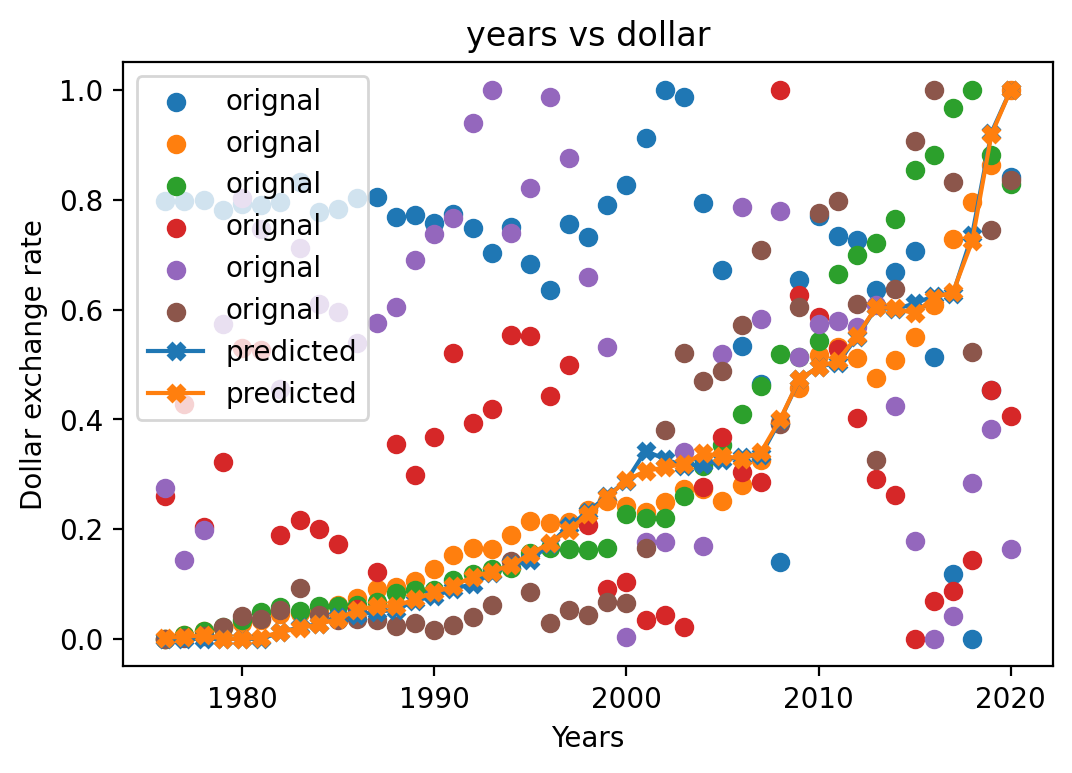

In [22]:
import matplotlib.pyplot as plt


plt.figure(dpi=200)
plt.title("years vs dollar")
plt.xlabel('Years')
plt.ylabel('Dollar exchange rate')
# plt.grid(color='black')
# plt.plot(year,y, label='Orignal')
# plt.plot(year,np.dot(x, theta_ready), label='predicted')
plt.scatter(np.array(year),np.array(x.iloc[:,1:2]), label='orignal', marker='o')
plt.scatter(np.array(year),np.array(x.iloc[:,2:3]), label='orignal', marker='o')
plt.scatter(np.array(year),np.array(x.iloc[:,3:4]), label='orignal', marker='o')
plt.scatter(np.array(year),np.array(x.iloc[:,4:5]), label='orignal', marker='o')
plt.scatter(np.array(year),np.array(x.iloc[:,5:6]), label='orignal', marker='o')
plt.scatter(np.array(year),np.array(x.iloc[:,6:7]), label='orignal', marker='o')
Y=np.array(Y)
plt.plot(year,Y, label='predicted', marker='X')
plt.plot(year,h, label='predicted', marker='X')


# plt.scatter(year,h, label='predicted', marker='X')
plt.legend()

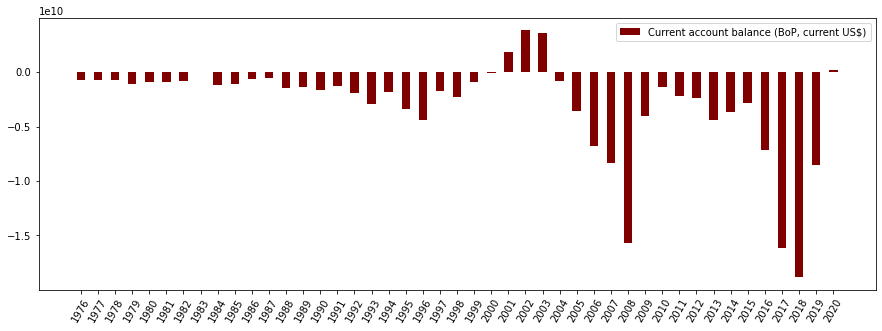

In [23]:

plt.figure(figsize = (15, 5))

plt.bar(np.ndarray.flatten(np.array(nontouch.iloc[:,0:1])),np.ndarray.flatten(np.array(nontouch.iloc[:,1:2])), color ='maroon',width = 0.5, label="Current account balance (BoP, current US$)")
plt.legend()
lj=plt.xticks(np.ndarray.flatten(np.array(nontouch.iloc[:,0:1])), rotation = 60)
# plt.yticks(np.ndarray.flatten(np.array(nontouch.iloc[:,1:2])))
# plt.bar(np.ndarray.flatten(np.array(x.iloc[0:2,1:2])),np.ndarray.flatten(np.array(x.iloc[0:2,0:1])))

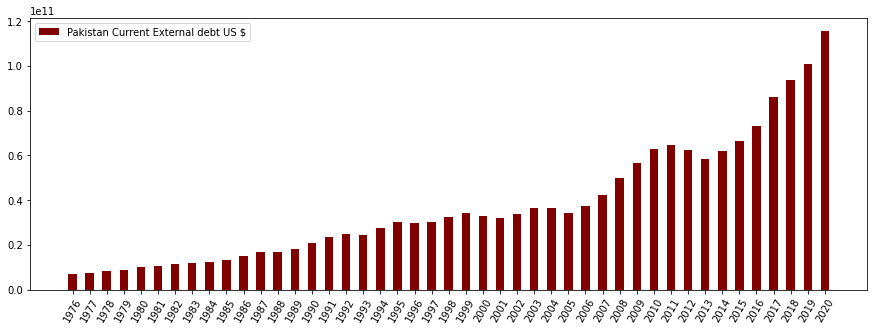

In [24]:
plt.figure(figsize = (15, 5))

plt.bar(np.ndarray.flatten(np.array(nontouch.iloc[:,0:1])),np.ndarray.flatten(np.array(nontouch.iloc[:,2:3])), color ='maroon',width = 0.5, label="Pakistan Current External debt US $")
plt.legend()
lj=plt.xticks(np.ndarray.flatten(np.array(nontouch.iloc[:,0:1])), rotation = 60)
# plt.yticks(np.ndarray.flatten(np.array(nontouch.iloc[:,1:2])))
# plt.bar(np.ndarray.flatten(np.array(x.iloc[0:2,1:2])),np.ndarray.flatten(np.array(x.iloc[0:2,0:1])))

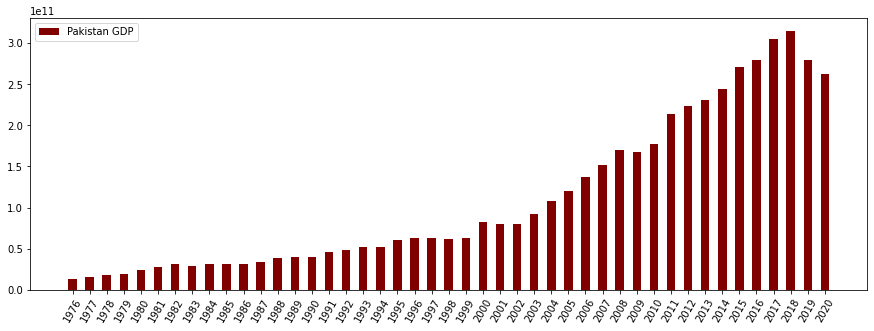

In [25]:
plt.figure(figsize = (15, 5))

plt.bar(np.ndarray.flatten(np.array(nontouch.iloc[:,0:1])),np.ndarray.flatten(np.array(nontouch.iloc[:,3:4])), color ='maroon',width = 0.5, label="Pakistan GDP")
plt.legend()
lj=plt.xticks(np.ndarray.flatten(np.array(nontouch.iloc[:,0:1])), rotation = 60)
# plt.yticks(np.ndarray.flatten(np.array(nontouch.iloc[:,1:2])))
# plt.bar(np.ndarray.flatten(np.array(x.iloc[0:2,1:2])),np.ndarray.flatten(np.array(x.iloc[0:2,0:1])))

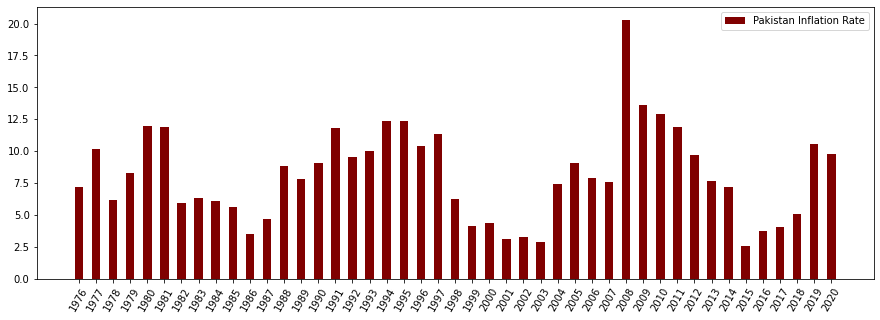

In [26]:
plt.figure(figsize = (15, 5))

plt.bar(np.ndarray.flatten(np.array(nontouch.iloc[:,0:1])),np.ndarray.flatten(np.array(nontouch.iloc[:,4:5])), color ='maroon',width = 0.5, label="Pakistan Inflation Rate")
plt.legend()
lj=plt.xticks(np.ndarray.flatten(np.array(nontouch.iloc[:,0:1])), rotation = 60)
# plt.yticks(np.ndarray.flatten(np.array(nontouch.iloc[:,1:2])))
# plt.bar(np.ndarray.flatten(np.array(x.iloc[0:2,1:2])),np.ndarray.flatten(np.array(x.iloc[0:2,0:1])))

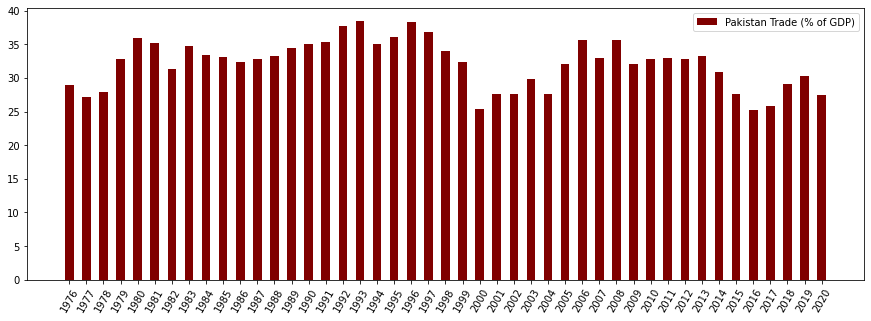

In [27]:
plt.figure(figsize = (15, 5))

plt.bar(np.ndarray.flatten(np.array(nontouch.iloc[:,0:1])),np.ndarray.flatten(np.array(nontouch.iloc[:,5:6])), color ='maroon',width = 0.5, label="Pakistan Trade (% of GDP)")
plt.legend()
lj=plt.xticks(np.ndarray.flatten(np.array(nontouch.iloc[:,0:1])), rotation = 60)
# plt.yticks(np.ndarray.flatten(np.array(nontouch.iloc[:,1:2])))
# plt.bar(np.ndarray.flatten(np.array(x.iloc[0:2,1:2])),np.ndarray.flatten(np.array(x.iloc[0:2,0:1])))

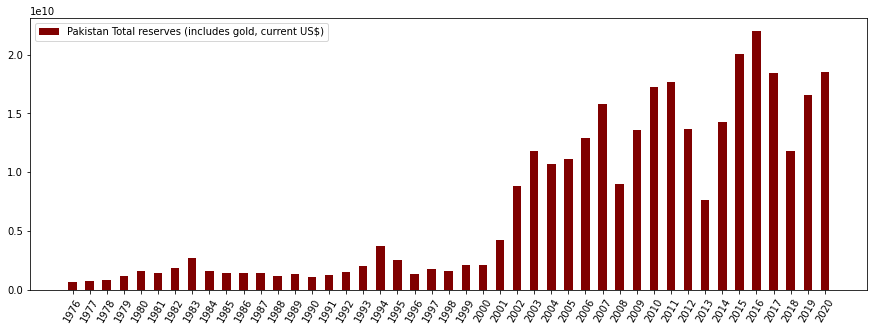

In [28]:
plt.figure(figsize = (15, 5))

plt.bar(np.ndarray.flatten(np.array(nontouch.iloc[:,0:1])),np.ndarray.flatten(np.array(nontouch.iloc[:,6:7])), color ='maroon',width = 0.5, label="Pakistan Total reserves (includes gold, current US$)")
plt.legend()
lj=plt.xticks(np.ndarray.flatten(np.array(nontouch.iloc[:,0:1])), rotation = 60)
# plt.yticks(np.ndarray.flatten(np.array(nontouch.iloc[:,1:2])))
# plt.bar(np.ndarray.flatten(np.array(x.iloc[0:2,1:2])),np.ndarray.flatten(np.array(x.iloc[0:2,0:1])))